In [1]:
import DMN3 as DMN
import pickle
import time
from matplotlib import pyplot as plt
import Data_Gen as DG
import os
import numpy as np
import pprint
import csv
import cProfile
from helperfuncs import read_data, load_model

In [2]:
# values taken from https://matmake.com/pure-metals.html
# Only did it to get somewhat realistic data.

# Aluminium = {'E':70.2,'v':0.345,'G':27.8}
# Bismuth = {'E':34,'v':0.33,'G':34.97}
# Calcium = {'E':19.6,'v':0.31,'G':7.85}
# Cobalt = {'E':211,'v':0.32,'G':82}
# Copper = {'E':130,'v':0.343,'G':48.3}
# Gallium = {'E':9.81,'v':0.47,'G':6.67}
# Gold = {'E':78.5,'v':0.42,'G':26}
# Iron = {'E':208.2,'v':0.291,'G':81.6}
# Lithium = {'E':4.91,'v':0.362,'G':4.24}
# Magnesium = {'E':44.7,'v':0.291,'G':17.3}
# Nickel = {'E':199.5,'v':0.312,'G':76}
# Osmium = {'E':558.6,'v':0.25,'G':223}
# Platinum = {'E':172.4,'v':0.397,'G':60.9}
# Plutonium = {'E':87.5,'v':0.18,'G':34.5}
# Tungsten = {'E':411,'v':0.28,'G':160}


In [3]:
# materials = [Aluminium,Bismuth,Calcium,Cobalt,Copper,Gallium,Gold,Iron,Lithium,Magnesium,Nickel,Osmium,Platinum,Plutonium,Tungsten]


In [4]:
# checks if the data set exists, if not it creates it.
# if not os.path.exists('Dummy_Data.csv'):
#     DG.create_proper_dataset(materials)

y = read_data("data/proper_data.csv")
z = read_data("data/Dummy_Data.csv")
w = read_data("data/proper_data1.csv")
q = read_data("data/optimised2_data.csv")
a = read_data("data/building_block_data.csv")
l = read_data("data/uniform_data.csv")

x = q

training_data = x[:200]
validation_data = x[200:]

In [5]:
N = 5
epoch_num = 50
# number of elements in mini batch must be able to divide the number of training data examples.
# in my current dummy data set, I have 105 examples and 105/21 = 5
mini_batch_size = 20

In [6]:
# creates the variable name for the network
Model = DMN.Tree(N)

# creates the entire network,
# linking nodes in the desired way.
# root stores all the important data. Model
# provides the methods to train the network
# and perform operations, such as feedforward etc.
root = Model.initialise(num_loading_steps=150)
# D_r = training_data[0][0]

error_test = []
cost = []
error_train = []

In [7]:
# met,error_train,error_test,root = DMN.load_model('DMN_HPC/results/model_N=5,lr=0.07222593206005602,lam=1.2391623473850234e-05.pkl')
# met,error_train,error_test,root = load_model('models/model_N=4.pkl')



In [8]:
# cProfile.run('Model.ADAM(epoch_num,root,mini_batch_size,training_data,0.02,validation_data=validation_data,lam =0, beta = 0.90,gamma = 0.99)')

In [9]:
# The actual training step.

# filename = 'N=5,possibly_good.pkl'
# error_test,cost ,error_train= Model.SGD(epoch_num,root,mini_batch_size,training_data,0.1,validation_data=validation_data, lam =10**(-8))
error_test, cost, error_train = Model.ADAM(
    epoch_num,
    root,
    mini_batch_size,
    training_data,
    0.005,
    validation_data=validation_data,
    lam=10**-7,
    beta=0.90,
    gamma=0.99,
)

Current Relative Validation error is 30.299 % 
Current Relative Training Error is: 30.923 % 
Epoch 0 is complete
Current Relative Validation error is 30.411 % 
Current Relative Training Error is: 26.659 % 
Epoch 5 is complete
Current Relative Validation error is 20.326 % 
Current Relative Training Error is: 7.427 % 
Epoch 10 is complete
Current Relative Validation error is 17.675 % 
Current Relative Training Error is: 5.727 % 
Epoch 15 is complete
Current Relative Validation error is 17.713 % 
Current Relative Training Error is: 5.681 % 
Epoch 20 is complete
Current Relative Validation error is 17.973 % 
Current Relative Training Error is: 5.767 % 
Epoch 25 is complete
Current Relative Validation error is 17.733 % 
Current Relative Training Error is: 5.730 % 
Epoch 30 is complete
Current Relative Validation error is 17.105 % 
Current Relative Training Error is: 5.560 % 
Epoch 35 is complete
Current Relative Validation error is 16.285 % 
Current Relative Training Error is: 5.373 % 
Epoc

Text(0.5, 1.0, 'N=5')

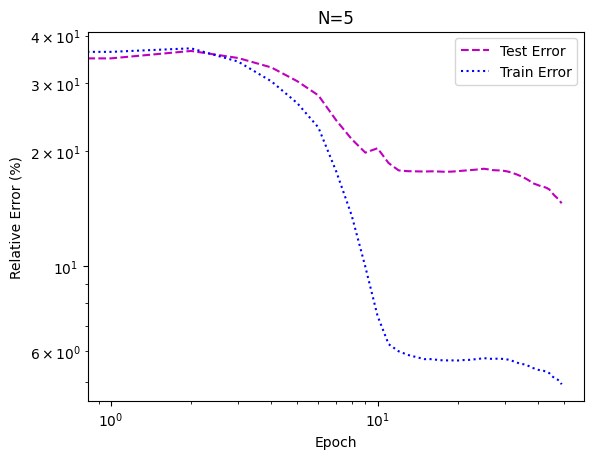

In [10]:
plt.plot(np.array(error_test), label="Test Error", linestyle="dashed", color="m")
plt.plot(np.array(error_train), label="Train Error", linestyle="dotted", color="b")


plt.ylabel("Relative Error (%)")
plt.xlabel("Epoch")
plt.legend()

# plt.savefig('error.jpg', dpi = 500)s

plt.xscale("log")
plt.yscale("log")

plt.title(f"N={N}")

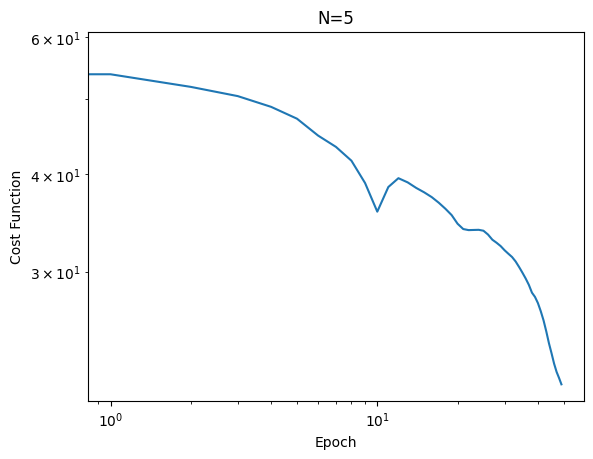

In [11]:
plt.plot(cost)
plt.ylabel("Cost Function")
plt.xlabel("Epoch")
plt.title(f"N={N}")
plt.xscale("log")
plt.yscale("log")

# plt.legend([f'N = {N}'])

In [12]:
# Model.propagate_weights(root)
from DMN3 import convert_vectorised, convert_matrix


# DMN.load_model('DMN_HPC/results/model_N=5,lr=0.07222593206005602,lam=1.2391623473850234e-05.pkl')
DMN.load_model("models/model_N=3.pkl")
Model = DMN.Tree(3)

e = 0
for i in range(1, len(training_data)):
    Model.FeedForward(root, training_data[i][0], training_data[i][1])
    e += np.linalg.norm(
        convert_vectorised(root.rotated_compliance)
        - convert_vectorised(training_data[i][2])
    ) / np.linalg.norm(convert_vectorised(training_data[i][2]))
    if i == 8:
        print(root.rotated_compliance)
        print(training_data[i][2])
print(100 * e / len(training_data))
# # print(validation_data[i][0],training_data[i][1],training_data[i][2])
#     print(np.linalg.norm(root.compliance-training_data[i][2]))
#     print(training_data[i][2],root.compliance)
#     # print(np.linalg.norm(root.compliance)-np.linalg.norm(root.rotated_compliance))

[ 3.52268731e-01 -1.15879518e-01 -5.68873767e-04  3.52189588e-01
 -9.39107332e-04  8.69100788e-01]
[ 3.54651793e-01 -8.08879488e-02  1.30524329e-03  3.54552833e-01
  7.86401253e-04  8.73082561e-01]
4.898634394795996


In [13]:
# a,b = Model.update_mini_batch(mini_batch,root)


# indxs = 2**N
nodes = []

for i in range(1, 2**N + 1):
    nodes.append(Model.fetch_node(root, N, i))
# print(root.error_alpha,root.error_delta)


for node in nodes:
    print(node.error_alpha, node.error_delta)
    # print(node.theta,node.activation,node.f)
    # print(node.compliance)
    # print(node.layer,node.index)
# print(a)
# print(b)
Model.FeedForward(root, mini_batch[0][0], mini_batch[0][1])
print(mini_batch[0][2], root.rotated_compliance)

[0. 0. 0. 0. 0. 0.] [-1.63327133e-05  3.97203464e-05 -9.83461617e-05  3.67980673e-05
  1.40470887e-04  7.57681529e-05]
[0. 0. 0. 0. 0. 0.] [-1.64270819e-05  1.47576969e-05 -8.49547686e-05  2.75128467e-05
  1.05026004e-04  5.66496484e-05]
[0. 0. 0. 0. 0. 0.] [ 1.22188732e-12  9.25877848e-13  8.13959911e-13  2.36186934e-13
 -1.94234217e-12  2.09507827e-12]
[0. 0. 0. 0. 0. 0.] [ 9.08121545e-13  6.31689811e-13  1.56854490e-12  2.36186934e-13
 -1.94234217e-12  2.09507827e-12]
[0. 0. 0. 0. 0. 0.] [ 7.33645199e-13 -2.13896754e-12  3.52859572e-12 -8.74190540e-13
  1.40296064e-13  1.27657316e-12]
[0. 0. 0. 0. 0. 0.] [-2.94193081e-13 -1.51480098e-12  1.64585195e-12 -8.74190540e-13
  1.40296064e-13  1.27657316e-12]
[0. 0. 0. 0. 0. 0.] [-2.48958461e-12  1.50014229e-12 -4.52838853e-13 -2.25219080e-12
  5.58833491e-12 -3.05371558e-12]
[0. 0. 0. 0. 0. 0.] [-2.46874345e-12  2.71703730e-12 -2.20354496e-12 -2.25219080e-12
  5.58833491e-12 -3.05371558e-12]
[0. 0. 0. 0. 0. 0.] [-4.12489388e-12 -7.87738862

NameError: name 'mini_batch' is not defined

In [ ]:
def calculate_nu_E(C):
    c11 = C[0, 0]
    c12 = C[0, 1]
    c33 = C[2, 2]

    nu_calc = 1 / 2 - c33 / (c11 + c12)
    E = 2 * (1 + nu_calc) * c33

    return E, nu_calc


x1 = training_data[0]
x2 = training_data[1]
x4 = training_data[3]
x6 = training_data[5]
x10 = training_data[9]
xs = [x1, x2, x4, x6, x10]

for i in range(3):
    for j in range(len(xs)):
        # print(DMN.convert_vectorised(xs[0][i]))
        # print(DMN.convert_vectorised(xs[1][i]))
        # print(DMN.convert_vectorised(xs[2][i]))

        print(DMN.convert_vectorised(xs[j][i]))

        # print(np.linalg.norm(DMN.convert_vectorised(xs[j][i])))
        D = DMN.convert_vectorised(xs[j][i])
        e_val, e_vect = np.linalg.eig(D)
        # print('Eigenvalues:',e_val)

        # print(np.linalg.norm(DMN.convert_vectorised(xs[0][i])))
        # print(np.linalg.norm(DMN.convert_vectorised(xs[1][i])))
        # print(np.linalg.norm(DMN.convert_vectorised(xs[2][i])))
        E, nu = calculate_nu_E(np.linalg.inv(DMN.convert_vectorised(xs[j][i])))

        # print(f'Youngs Modulus: {E:.2f} GPa, Poissons Ratio: {nu:.2f}')

        # print(calculate_nu_E(np.linalg.inv(DMN.convert_vectorised(xs[0][i]))))
        # print(calculate_nu_E(np.linalg.inv(DMN.convert_vectorised(xs[1][i]))))
        # print(calculate_nu_E(np.linalg.inv(DMN.convert_vectorised(xs[2][i]))))
        # print(calculate_nu_E(np.linalg.inv(DMN.convert_vectorised(xs[3][i]))))
    print("------------------------------------------")

In [ ]:
a, b, c, root = DMN.load_model("model_N=3.pkl")

Model = DMN.Tree(a["N"])

# Model.FeedForward(root,training_data[0][0],training_data[0][1])

nodes = []

for i in range(1, 2 ** a["N"] + 1):
    nodes.append(Model.fetch_node(root, a["N"], i))
# print(root.error_alpha,root.error_delta)


for node in nodes:
    print(node.theta * 180 / np.pi, node.activation, node.f)

In [ ]:
N_samples = 50
lam = np.random.uniform((-7), (-3), (N_samples, 1))
lr = np.random.uniform(-4, -0.5, (N_samples, 1))


samples = np.hstack((10**lr, 10**lam))
with open("params.txt", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(samples)


samples

In [ ]:
files = os.listdir("DMN_HPC/results")

errs = []

for index, file in enumerate(files):
    metadata, training_err, val_error, root = DMN.load_model("DMN_HPC/results/" + file)

    # print(metadata)
    N = metadata["N"]
    epoch_num = metadata["Epochs"]
    lr = metadata["learming_rate"]
    lam = metadata["regularisation"]
    opt = metadata["optimiser"]
    errs.append(lam)
    # print(epoch_num)
    # if N ==5 and epoch_num > 8000:
    #     plt.plot(val_error,label = f'lr = {lr:2e}, lam = {lam:2e}, opt = {opt}')
    #     plt.legend()

    if min(training_err) < 4:
        print(min(training_err))
        print(file)

        # plt.xscale('log')
        # plt.yscale('log')
        plt.plot(
            val_error, label=f"lr = {lr:.1e}, lam = {lam:.1e}, opt = {opt},N = {N}"
        )

        plt.legend()

# plt.close()